In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

sample_rate = 250

# Load data from .txt file

In [3]:
df = pd.read_csv('data/cell_LF_2.txt', usecols=[1,2,3,4,12], skiprows=7, index_col=None, header=None)
data = df.to_numpy()
data = data.astype(float)

In [4]:
data.shape

(87387, 5)

# Filter the raw data
## Build your own filter

In [5]:
def bandpass(start, stop, data, sample_rate = 250):
    bp_Hz = np.array([start, stop])
    b, a = signal.butter(5, bp_Hz / (sample_rate / 2.0), btype='bandpass')
    return signal.lfilter(b, a, data, axis=0)

def notch(val, data, sample_rate= 250):
    notch_freq_Hz = np.array([float(val)])
    for freq_Hz in np.nditer(notch_freq_Hz):
        bp_stop_Hz = freq_Hz + 3.0 * np.array([-1, 1])
        b, a = signal.butter(3, bp_stop_Hz / (sample_rate / 2.0), 'bandstop')
        fin = data = signal.lfilter(b, a, data)
    return fin

def fft(data, sample_rate):
    L = len(data)
    freq = np.linspace(0.0, 1.0 / (2.0 * sample_rate **-1), L // 2)
    yi = np.fft.fft(data)[1:]
    y = yi[range(int(L / 2))]
    return freq, abs(y)

## Plot the raw data

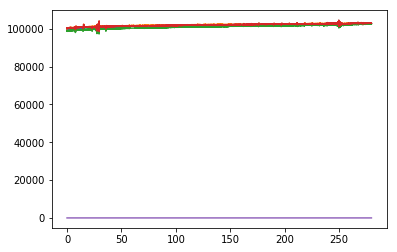

In [6]:
# raw channels
channels = []
for i in range(5):
    channels.append(data[40*sample_rate:-30*sample_rate,i].astype(np.float))
t = len(channels[0])/sample_rate
time = np.linspace(0, t, len(channels[0]))
for i in range(len(channels)):
    plt.plot(time,channels[i])
#plt.ylim(0, 5)

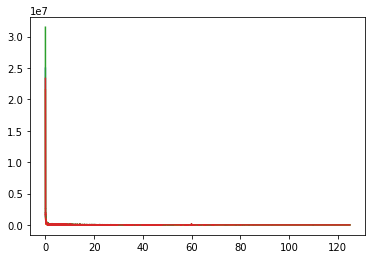

In [7]:
# fft of raw channels
for i in range(len(channels)):
    if i < 4:
        freq, y = fft(channels[i], sample_rate)
        plt.plot(freq, y)
#plt.ylim(0, 1e7)
#plt.xlim(0,100)

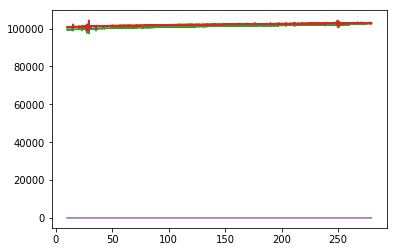

In [8]:
#applied notch filter = 60
notch_channels = []
for i in range(len(channels)):
    if i < 4:
        notch_channels.append(notch(60,channels[i], sample_rate = sample_rate))
    else:
        notch_channels.append(channels[i])
for i in range(len(notch_channels)):
    plt.plot(time[10*sample_rate:], notch_channels[i][10*sample_rate:])

(0, 100)

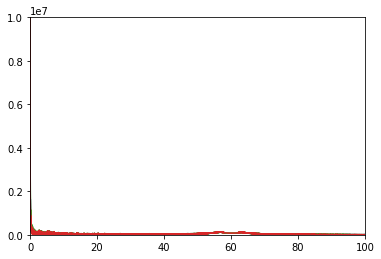

In [9]:
# fft of applied notch
for i in range(len(notch_channels)):
    if i < 4:
        freq, y = fft(notch_channels[i], sample_rate)
        plt.plot(freq, y)
plt.ylim(0, 1e7)
plt.xlim(0,100)

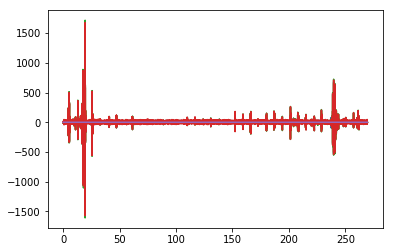

In [10]:
#applied bandpass filter = 6-25
band = (6,25)
bandpass_channels = []
for i in range(len(notch_channels)):
    if i < 4:
        bandpass_channels.append(bandpass(band[0],band[1],notch_channels[i], sample_rate = sample_rate))
    else:
        bandpass_channels.append(notch_channels[i])
#remove 10 seconds' data
final_channels = []
for i in range(len(bandpass_channels)):
    final_channels.append(bandpass_channels[i][int(10*sample_rate):])

t = len(final_channels[0])/sample_rate
time = np.linspace(0, t, len(final_channels[0]))
  
    
    
for i in range(len(bandpass_channels)):
    plt.plot(time, final_channels[i])
#plt.xlim(0,10)

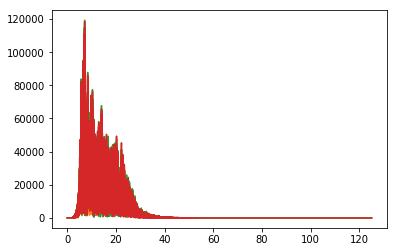

In [11]:
# fft of applied bandpass
for i in range(len(final_channels)):
    if i < 4:
        freq, y = fft(final_channels[i], sample_rate)
        plt.plot(freq, y)
#plt.ylim(0, 1e7)
#plt.xlim(0,100)

In [12]:
from scipy.signal import find_peaks

In [13]:
peaks, _ = find_peaks(final_channels[4], threshold=-0.5, distance=1500, height=0)

In [14]:
type(peaks)

numpy.ndarray

In [15]:
peaks.shape

(34,)

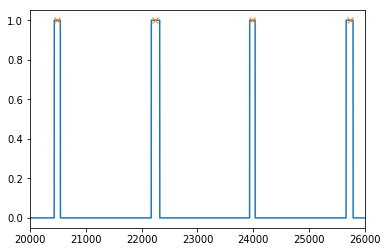

In [16]:
plt.plot(abs(final_channels[4]))
plt.plot(peaks, abs(final_channels[4][peaks]), "x")
plt.xlim(20000,26000)
plt.show()

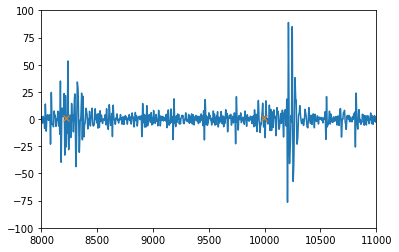

In [21]:
plt.plot(final_channels[1])
plt.plot(peaks, final_channels[4][peaks], "x")
plt.xlim(8000,11000)
plt.ylim(-100,100)
plt.show()

In [22]:
final_channels[0].shape[0]

67387

In [23]:
final_array = np.zeros((4, final_channels[0].shape[0]))
for i in range(4):
    final_array[i,:] = final_channels[i]

In [24]:
final_array.shape

(4, 67387)

In [25]:
num = peaks.shape[0]

In [24]:
dataset = np.zeros((num-1, 4, 375))
dataset.shape

(33, 4, 375)

In [25]:
peaks[1]

6501

In [26]:
for i in range(num-1):
    dataset[i] = final_array[:, peaks[i]+100 : peaks[i] + 475]
    
    

In [27]:
dataset.shape

(33, 4, 375)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import find_peaks
sample_rate = 250
def bandpass(start, stop, data, sample_rate = 250):
    bp_Hz = np.array([start, stop])
    b, a = signal.butter(5, bp_Hz / (sample_rate / 2.0), btype='bandpass')
    return signal.lfilter(b, a, data, axis=0)

def notch(val, data, sample_rate= 250):
    notch_freq_Hz = np.array([float(val)])
    for freq_Hz in np.nditer(notch_freq_Hz):
        bp_stop_Hz = freq_Hz + 3.0 * np.array([-1, 1])
        b, a = signal.butter(3, bp_stop_Hz / (sample_rate / 2.0), 'bandstop')
        fin = data = signal.lfilter(b, a, data)
    return fin

def fft(data, sample_rate):
    L = len(data)
    freq = np.linspace(0.0, 1.0 / (2.0 * sample_rate **-1), L // 2)
    yi = np.fft.fft(data)[1:]
    y = yi[range(int(L / 2))]
    return freq, abs(y)

In [369]:
def dataset_builder(rawdata):
    df = pd.read_csv(rawdata, usecols=[1,2,3,4,12], skiprows=7, index_col=None, header=None)
    data = df.to_numpy()
    data = data.astype(float)
    channels = []
    for i in range(5):
        channels.append(data[40*sample_rate:-30*sample_rate,i].astype(np.float))
        
    notch_channels = []
    for i in range(len(channels)):
        if i < 4:
            notch_channels.append(notch(60,channels[i], sample_rate = sample_rate))
        else:
            notch_channels.append(channels[i])
            
    band = (1,50)
    bandpass_channels = []
    for i in range(len(notch_channels)):
        if i < 4:
            bandpass_channels.append(bandpass(band[0],band[1],notch_channels[i], sample_rate = sample_rate))
        else:
            bandpass_channels.append(notch_channels[i])
            
    #remove 1 seconds' data
    final_channels = []
    for i in range(len(bandpass_channels)):
        final_channels.append(bandpass_channels[i][int(1*sample_rate):])
    #find peaks
    peaks, _ = find_peaks(final_channels[4], threshold=-1, distance=1500, height=0)
    num = peaks.shape[0]
    
    final_array = np.zeros((4, final_channels[0].shape[0]))
    for i in range(4):
        final_array[i,:] = final_channels[i]

    dataset = np.zeros((num-1, 4, 400)) # leave the last two
    for i in range(num-1):
        dataset[i] = final_array[:, peaks[i]+600 : peaks[i] + 1000]## 0.4s after trigger to  475/250s
        
    return dataset

    


In [370]:
class_1 = 'data/enhance_LF.txt'
class_2 = 'data/stop_LF_1.txt'
class_3 = 'data/interlinked_LF.txt'
class_4 = 'data/cell_LF.txt'
class_5 = 'data/stop_LF_2.txt'
class_6 = 'data/cell_LF_2.txt'

dataset_1 = dataset_builder(class_1)
dataset_2 = dataset_builder(class_2)
dataset_3 = dataset_builder(class_3)
dataset_4 = dataset_builder(class_4)
dataset_5 = dataset_builder(class_5)
dataset_6 = dataset_builder(class_6)

# dataset_2 = np.concatenate((dataset_2, dataset_5), axis=0)
# dataset_4 = np.concatenate((dataset_4, dataset_6), axis=0)

In [371]:
dataset_1.shape

(71, 4, 400)

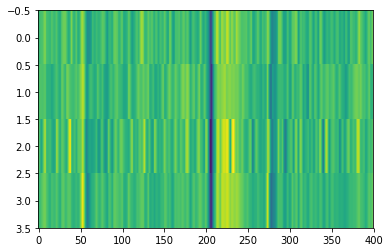

In [372]:
plt.imshow(dataset_1[3], aspect="auto")

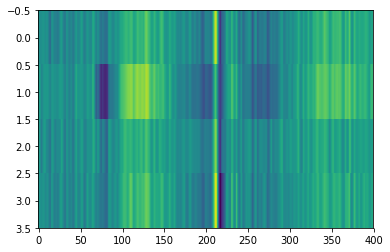

In [373]:
plt.imshow(dataset_6[4], aspect="auto")

In [374]:
y_1 = np.array([1,0,0,0])
y_1 = np.tile(y_1, (dataset_1.shape[0],1))

y_2 = np.array([0,1,0,0])
y_2 = np.tile(y_2, (dataset_2.shape[0],1))

y_3 = np.array([0,0,1,0])
y_3 = np.tile(y_3, (dataset_3.shape[0],1))

y_4 = np.array([0,0,0,1])
y_4 = np.tile(y_4, (dataset_4.shape[0],1))

y_5 = np.array([0,1,0,0])
y_5 = np.tile(y_5, (dataset_5.shape[0],1))

y_6 = np.array([0,0,0,1])
y_6 = np.tile(y_6, (dataset_6.shape[0],1))

In [375]:
y_1_svm = np.ones(dataset_1.shape[0])
y_2_svm = np.ones(dataset_2.shape[0])*2
y_3_svm = np.ones(dataset_3.shape[0])*3
y_4_svm = np.ones(dataset_4.shape[0])*4
y_5_svm = np.ones(dataset_5.shape[0])*5
y_6_svm = np.ones(dataset_6.shape[0])*6

In [376]:
y_svm = np.concatenate((y_1_svm, y_2_svm, y_3_svm, y_4_svm, y_5_svm, y_6_svm))

In [377]:
y_svm.shape

(272,)

In [378]:
y = np.concatenate((y_1, y_2, y_3, y_4, y_5, y_6), axis=0)

In [379]:
y.shape

(272, 4)

In [380]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [381]:
y_lstm = y

In [382]:
y_lstm.shape

(272, 4)

In [383]:
X = np.concatenate((dataset_1, dataset_2, dataset_3, dataset_4, dataset_5, dataset_6), axis=0)

In [384]:
X.shape[0]

272

In [385]:
X_lstm = X

In [386]:
X_lstm.shape

(272, 4, 400)

In [387]:
X = np.reshape(X,(X.shape[0],X.shape[1]*X.shape[2]))

In [388]:
X.shape

(272, 1600)

# SVM

In [236]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_svm, test_size=0.4, random_state=42, stratify=y)

In [237]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [238]:
y_pred = clf.predict(X_test)

In [239]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.23853211009174313


In [240]:
from sklearn.model_selection import cross_val_score
clf=svm.SVC(kernel='linear')
scores = cross_val_score(clf, X, y_svm, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.2        0.13793103 0.17241379 0.28571429 0.19230769 0.23076923
 0.23076923 0.26923077 0.19230769 0.15384615]


# CNN

In [556]:
from keras.layers import Conv1D, Dropout, GlobalAveragePooling1D, MaxPooling1D

model = Sequential()
model.add(Conv1D(60, 10, strides=1, padding='same', activation='relu', input_shape=(400, 4)))
model.add(Dropout(0.2))
model.add(MaxPooling1D(2))
model.add(Conv1D(60, 10, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(2))
model.add(Conv1D(60, 10, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(2))
model.add(Conv1D(60, 10, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(2))

model.add(GlobalAveragePooling1D())
model.add(Dense(50, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [557]:
X_lstm.shape

(272, 4, 400)

In [558]:
X_CNN = np.transpose(X_lstm, [0,2,1])

In [559]:
X_CNN.shape

(272, 400, 4)

In [560]:
X_train_CNN, X_test_CNN, y_train_CNN, y_test_CNN = train_test_split(X_CNN, y_lstm, test_size=0.4, random_state=42, stratify=y)

In [561]:
model.fit(X_train_CNN, y_train_CNN, epochs = 100, validation_split=0.15, callbacks = [ES])

Train on 138 samples, validate on 25 samples
Epoch 1/100
138/138 [==============================] - 4s 30ms/step - loss: 1.4908 - acc: 0.6250 - val_loss: 0.5867 - val_acc: 0.7300
Epoch 2/100
138/138 [==============================] - 0s 2ms/step - loss: 0.7189 - acc: 0.7319 - val_loss: 0.5416 - val_acc: 0.7500
Epoch 3/100
138/138 [==============================] - 0s 2ms/step - loss: 0.5943 - acc: 0.7482 - val_loss: 0.6201 - val_acc: 0.7400
Epoch 4/100
138/138 [==============================] - 0s 2ms/step - loss: 0.5821 - acc: 0.7500 - val_loss: 0.5537 - val_acc: 0.7500
Epoch 5/100
138/138 [==============================] - 0s 2ms/step - loss: 0.5591 - acc: 0.7482 - val_loss: 0.5448 - val_acc: 0.7500
Epoch 6/100
138/138 [==============================] - 0s 2ms/step - loss: 0.5528 - acc: 0.7482 - val_loss: 0.5750 - val_acc: 0.7500
Epoch 7/100
138/138 [==============================] - 0s 2ms/step - loss: 0.5400 - acc: 0.7591 - val_loss: 0.5717 - val_acc: 0.7400
Epoch 8/100
138/138 [==

In [562]:
y_pred_CNN = model.predict(X_test_CNN)

y_pred_CNN_class = np.argmax(y_pred_CNN, axis = 1)

y_pred_CNN_class

y_test_CNN_class = np.argmax(y_test_CNN, axis =1)

y_test_CNN_class

print(metrics.accuracy_score(y_test_CNN_class, y_pred_CNN_class))

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_CNN_class, y_pred_CNN_class)

0.5871559633027523


array([[20,  7,  0,  1],
       [ 1, 12,  8,  9],
       [ 0,  4, 12,  9],
       [ 0,  3,  3, 20]], dtype=int64)

In [567]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[20  7  0  1]
 [ 1 12  8  9]
 [ 0  4 12  9]
 [ 0  3  3 20]]


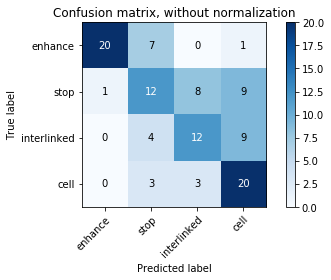

In [568]:
plot_confusion_matrix(y_test_CNN_class, y_pred_CNN_class, classes=['enhance','stop','interlinked','cell'],
                      title='Confusion matrix, without normalization')

# LSTM

In [410]:
from keras import Model
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Input, Dense, Bidirectional, Flatten
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping

model = Sequential()

I = Input(shape=(4,400))
L = Bidirectional(LSTM(units = 10, return_sequences = True, activation="tanh"))(I)

F = Flatten()(L)
D1 = Dense(10, activation='sigmoid')(F)
D2 = Dense(4, activation='softmax')(D1)


subvocal = Model(inputs=[I], outputs = [D2])
ES = EarlyStopping(monitor='loss',patience=5)

subvocal.compile(loss = "binary_crossentropy", 
                  optimizer = "adam", metrics = ['accuracy'])

subvocal.summary()

X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.4, random_state=42, stratify=y)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 4, 400)            0         
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 4, 20)             32880     
_________________________________________________________________
flatten_16 (Flatten)         (None, 80)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                810       
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 44        
Total params: 33,734
Trainable params: 33,734
Non-trainable params: 0
_________________________________________________________________


In [411]:
subvocal.fit(X_train, y_train, epochs = 100, validation_split=0.15, callbacks = [ES])

Train on 138 samples, validate on 25 samples
Epoch 1/100
138/138 [==============================] - 3s 21ms/step - loss: 0.5739 - acc: 0.7500 - val_loss: 0.5506 - val_acc: 0.7500
Epoch 2/100
138/138 [==============================] - 0s 217us/step - loss: 0.5414 - acc: 0.7500 - val_loss: 0.5516 - val_acc: 0.7500
Epoch 3/100
138/138 [==============================] - 0s 202us/step - loss: 0.5258 - acc: 0.7500 - val_loss: 0.5499 - val_acc: 0.7500
Epoch 4/100
138/138 [==============================] - 0s 239us/step - loss: 0.5143 - acc: 0.7500 - val_loss: 0.5517 - val_acc: 0.7500
Epoch 5/100
138/138 [==============================] - 0s 217us/step - loss: 0.5045 - acc: 0.7500 - val_loss: 0.5537 - val_acc: 0.7500
Epoch 6/100
138/138 [==============================] - 0s 202us/step - loss: 0.4958 - acc: 0.7500 - val_loss: 0.5533 - val_acc: 0.7500
Epoch 7/100
138/138 [==============================] - 0s 210us/step - loss: 0.4877 - acc: 0.7500 - val_loss: 0.5546 - val_acc: 0.7500
Epoch 8/100

Epoch 61/100
138/138 [==============================] - 0s 195us/step - loss: 0.1743 - acc: 0.9837 - val_loss: 0.6349 - val_acc: 0.6800
Epoch 62/100
138/138 [==============================] - 0s 202us/step - loss: 0.1711 - acc: 0.9837 - val_loss: 0.6359 - val_acc: 0.6800
Epoch 63/100
138/138 [==============================] - 0s 246us/step - loss: 0.1678 - acc: 0.9837 - val_loss: 0.6370 - val_acc: 0.6800
Epoch 64/100
138/138 [==============================] - 0s 195us/step - loss: 0.1648 - acc: 0.9837 - val_loss: 0.6394 - val_acc: 0.6800
Epoch 65/100
138/138 [==============================] - 0s 231us/step - loss: 0.1617 - acc: 0.9837 - val_loss: 0.6416 - val_acc: 0.6800
Epoch 66/100
138/138 [==============================] - 0s 246us/step - loss: 0.1588 - acc: 0.9855 - val_loss: 0.6441 - val_acc: 0.6800
Epoch 67/100
138/138 [==============================] - 0s 231us/step - loss: 0.1560 - acc: 0.9891 - val_loss: 0.6466 - val_acc: 0.6800
Epoch 68/100
138/138 [==========================

In [502]:
y_pred = subvocal.predict(X_test)

y_pred_class = np.argmax(y_pred, axis = 1)

y_pred_class

y_test_class = np.argmax(y_test, axis =1)

y_test_class

print(metrics.accuracy_score(y_test_class, y_pred_class))

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_class, y_pred_class)

0.28440366972477066


array([[10,  8,  6,  4],
       [ 6, 10,  6,  8],
       [ 8,  5,  6,  6],
       [ 4, 11,  6,  5]], dtype=int64)

In [62]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# KNN

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [178]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [179]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test)

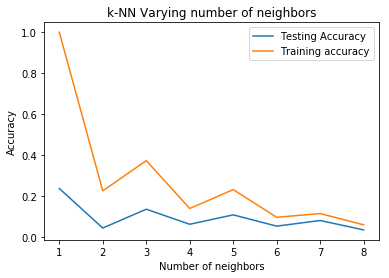

In [180]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [181]:
knn = KNeighborsClassifier(n_neighbors=3)

In [182]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [183]:
knn.score(X_test, y_test)

0.13761467889908258

In [184]:
from sklearn.metrics import confusion_matrix

In [185]:
y_pred = knn.predict(X_test)

In [186]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[ 8,  9, 10,  1],
       [13,  6, 11,  0],
       [14,  4,  6,  1],
       [ 7,  8, 10,  1]], dtype=int64)

In [261]:
pd.crosstab(y_test.argmax(axis=1), y_pred.argmax(axis=1), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,All
True,,,,,
0,9,2,18,0,29
1,8,1,9,0,18
2,9,2,13,2,26
3,10,1,3,0,14
All,36,6,43,2,87


In [262]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,50)}

In [263]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)

E:\software\anaconda\envs\DL\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [264]:
knn_cv.best_score_

0.19444444444444445

In [265]:
knn_cv.best_params_

{'n_neighbors': 1}